In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score

mode_dict = {0: "standing", 1: "walking", 2: "running"}

data_s = pd.read_csv("./dataset_s.csv")  # standing 0
data_w = pd.read_csv("./dataset_w.csv")  # walking 1
data_r = pd.read_csv("./dataset_r.csv")  # running 2

# drop the data if gyro_x/y/z is zero
data_s_1 = data_s[data_s['gyro_x'] != 0]
data_w_1 = data_w[data_w['gyro_x'] != 0]
data_r_1 = data_r[data_r['gyro_x'] != 0]

frames = [data_s_1, data_w_1, data_r_1]
data = pd.concat(frames)
pd.set_option('display.max_rows', None)
data.to_csv("./data_all.csv")
data.head()


,time,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
13,2463163198,0,-1.327648,3.116518,8.896414,0.844024,-0.011977,-0.011977
14,2463163203,0,-1.184002,3.545062,8.250007,0.844024,-0.011977,-0.011977
15,2463163213,0,-0.923045,3.698284,7.728094,0.844024,-0.011977,-0.011977
16,2463163208,0,-0.923045,3.698284,7.728094,0.875789,-0.019918,-0.019918
17,2463163218,0,-0.923045,3.698284,7.728094,0.827531,-0.066954,-0.066954


In [3]:
labels = data.activity
data_dropped = data.drop(["time", "activity"], axis=1)
features = data_dropped.values
data_dropped.head()

,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
13,-1.327648,3.116518,8.896414,0.844024,-0.011977,-0.011977
14,-1.184002,3.545062,8.250007,0.844024,-0.011977,-0.011977
15,-0.923045,3.698284,7.728094,0.844024,-0.011977,-0.011977
16,-0.923045,3.698284,7.728094,0.875789,-0.019918,-0.019918
17,-0.923045,3.698284,7.728094,0.827531,-0.066954,-0.066954


In [7]:
FEATURES = features
LABELS = labels.values

In [6]:
X_embedded = TSNE(n_components=2).fit_transform(FEATURES)

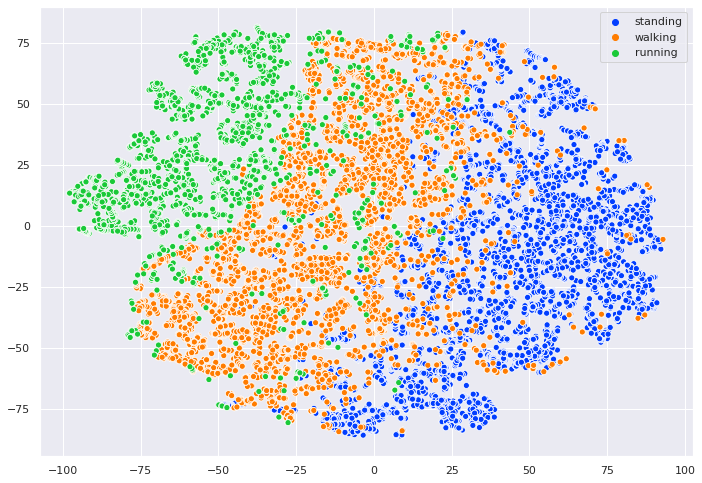

In [8]:
STR_LABELS = list(map(mode_dict.get, list(LABELS)))
import seaborn as sns
sns.set(rc={'figure.figsize': (11.7, 8.27)})
palette = sns.color_palette("bright", 3)
sns.scatterplot(X_embedded[:, 0],
                X_embedded[:, 1],
                hue=STR_LABELS,
                legend='full',
                palette=palette)
plt.show()